In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("dataset_group.csv")
df.shape

(20641, 3)

In [3]:
# Display basic info
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


None

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [4]:
# Summary statistics
display(df.describe())

,Order_id
count,20641.000000
mean,575.986289
std,328.557078
min,1.000000
25%,292.000000
50%,581.000000
75%,862.000000
max,1139.000000


In [5]:
# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

# Extract time-based features for trend analysis
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week
df["Quarter"] = df["Date"].dt.quarter

# Summary statistics for order frequency by year, month, and week
yearly_trend = df["Year"].value_counts().sort_index()
monthly_trend = df.groupby("Month")["Order_id"].nunique()
weekly_trend = df.groupby("Week")["Order_id"].nunique()
quarterly_trend = df.groupby("Quarter")["Order_id"].nunique()

# Check unique products
unique_products = df["Product"].nunique()

# Display results
yearly_trend, monthly_trend, weekly_trend, quarterly_trend, unique_products

(Year
 2018    9479
 2019    9333
 2020    1829
 Name: count, dtype: int64,
 Month
 1    174
 2    156
 3    124
 4    110
 5    133
 6    105
 7    115
 8    107
 9    115
 Name: Order_id, dtype: int64,
 Week
 1     32
 2     46
 3     39
 4     32
 5     43
 6     39
 7     35
 8     44
 9     40
 10    28
 11    22
 12    28
 13    27
 14    31
 15    22
 16    25
 17    25
 18    31
 19    27
 20    27
 21    32
 22    29
 23    25
 24    24
 25    20
 26    30
 27    29
 28    27
 29    26
 30    24
 31    26
 32    22
 33    25
 34    27
 35    19
 36    32
 37    31
 38    21
 39    24
 40     3
 Name: Order_id, dtype: int64,
 Quarter
 1    454
 2    348
 3    337
 Name: Order_id, dtype: int64,
 37)

In [6]:
# Check duplicate values
df.duplicated().sum()

4730

In [7]:
# Step 1: Remove duplicates if any
df = df.drop_duplicates()

# Step 2: Clean 'Product' names by removing special characters and converting to lowercase
df["Product"] = df["Product"].str.lower().str.replace(r"[^a-z0-9\s]", "", regex=True)

# Step 3: Check for missing values again
missing_values = df.isnull().sum()

# Step 4: Aggregate transactions by Order_id for Market Basket Analysis
basket_data = df.groupby("Order_id")["Product"].apply(list).reset_index()

# Display results
missing_values, df.head(), basket_data.head()

(Date        0
 Order_id    0
 Product     0
 Year        0
 Month       0
 Week        0
 Quarter     0
 dtype: int64,
         Date  Order_id        Product  Year  Month  Week  Quarter
 0 2018-01-01         1         yogurt  2018      1     1        1
 1 2018-01-01         1           pork  2018      1     1        1
 2 2018-01-01         1  sandwich bags  2018      1     1        1
 3 2018-01-01         1     lunch meat  2018      1     1        1
 4 2018-01-01         1    all purpose  2018      1     1        1,
    Order_id                                            Product
 0         1  [yogurt, pork, sandwich bags, lunch meat, all ...
 1         2  [toilet paper, shampoo, hand soap, waffles, ch...
 2         3  [soda, pork, soap, ice cream, toilet paper, di...
 3         4  [cereals, juice, lunch meat, soda, toilet pape...
 4         5  [sandwich loaves, pasta, tortillas, mixes, han...)

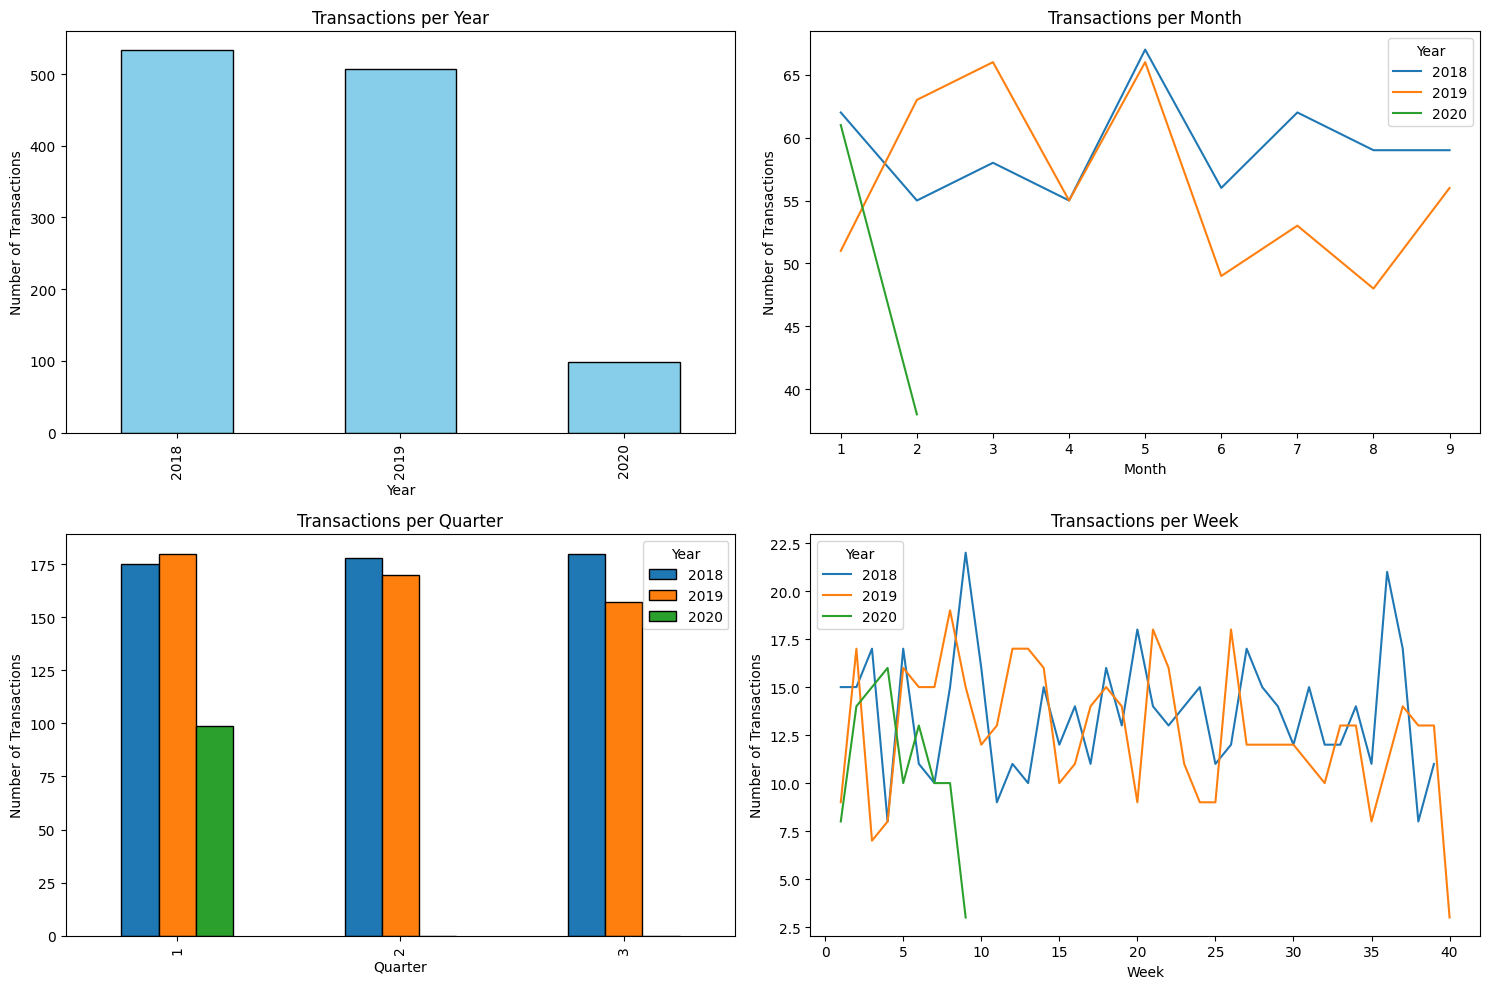

In [8]:
# Extract time-based features for trend analysis
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week
df["Quarter"] = df["Date"].dt.quarter

# Re-run univariate trend analysis
yearly_trend = df.groupby("Year")["Order_id"].nunique()
monthly_trend = df.groupby(["Year", "Month"])["Order_id"].nunique().unstack(level=0)
quarterly_trend = df.groupby(["Year", "Quarter"])["Order_id"].nunique().unstack(level=0)
weekly_trend = df.groupby(["Year", "Week"])["Order_id"].nunique().unstack(level=0)

# Visualize trends
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Yearly Trend
yearly_trend.plot(kind="bar", ax=axes[0, 0], color="skyblue", edgecolor="black")
axes[0, 0].set_title("Transactions per Year")
axes[0, 0].set_ylabel("Number of Transactions")

# Monthly Trend
monthly_trend.plot(ax=axes[0, 1])
axes[0, 1].set_title("Transactions per Month")
axes[0, 1].set_ylabel("Number of Transactions")

# Quarterly Trend
quarterly_trend.plot(kind="bar", ax=axes[1, 0], edgecolor="black")
axes[1, 0].set_title("Transactions per Quarter")
axes[1, 0].set_ylabel("Number of Transactions")

# Weekly Trend
weekly_trend.plot(ax=axes[1, 1])
axes[1, 1].set_title("Transactions per Week")
axes[1, 1].set_ylabel("Number of Transactions")

plt.tight_layout()
plt.show()

C:\Users\agnes\AppData\Local\Temp\ipykernel_22236\4073667361.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, ax=axes[0, 0], palette="Blues_r")


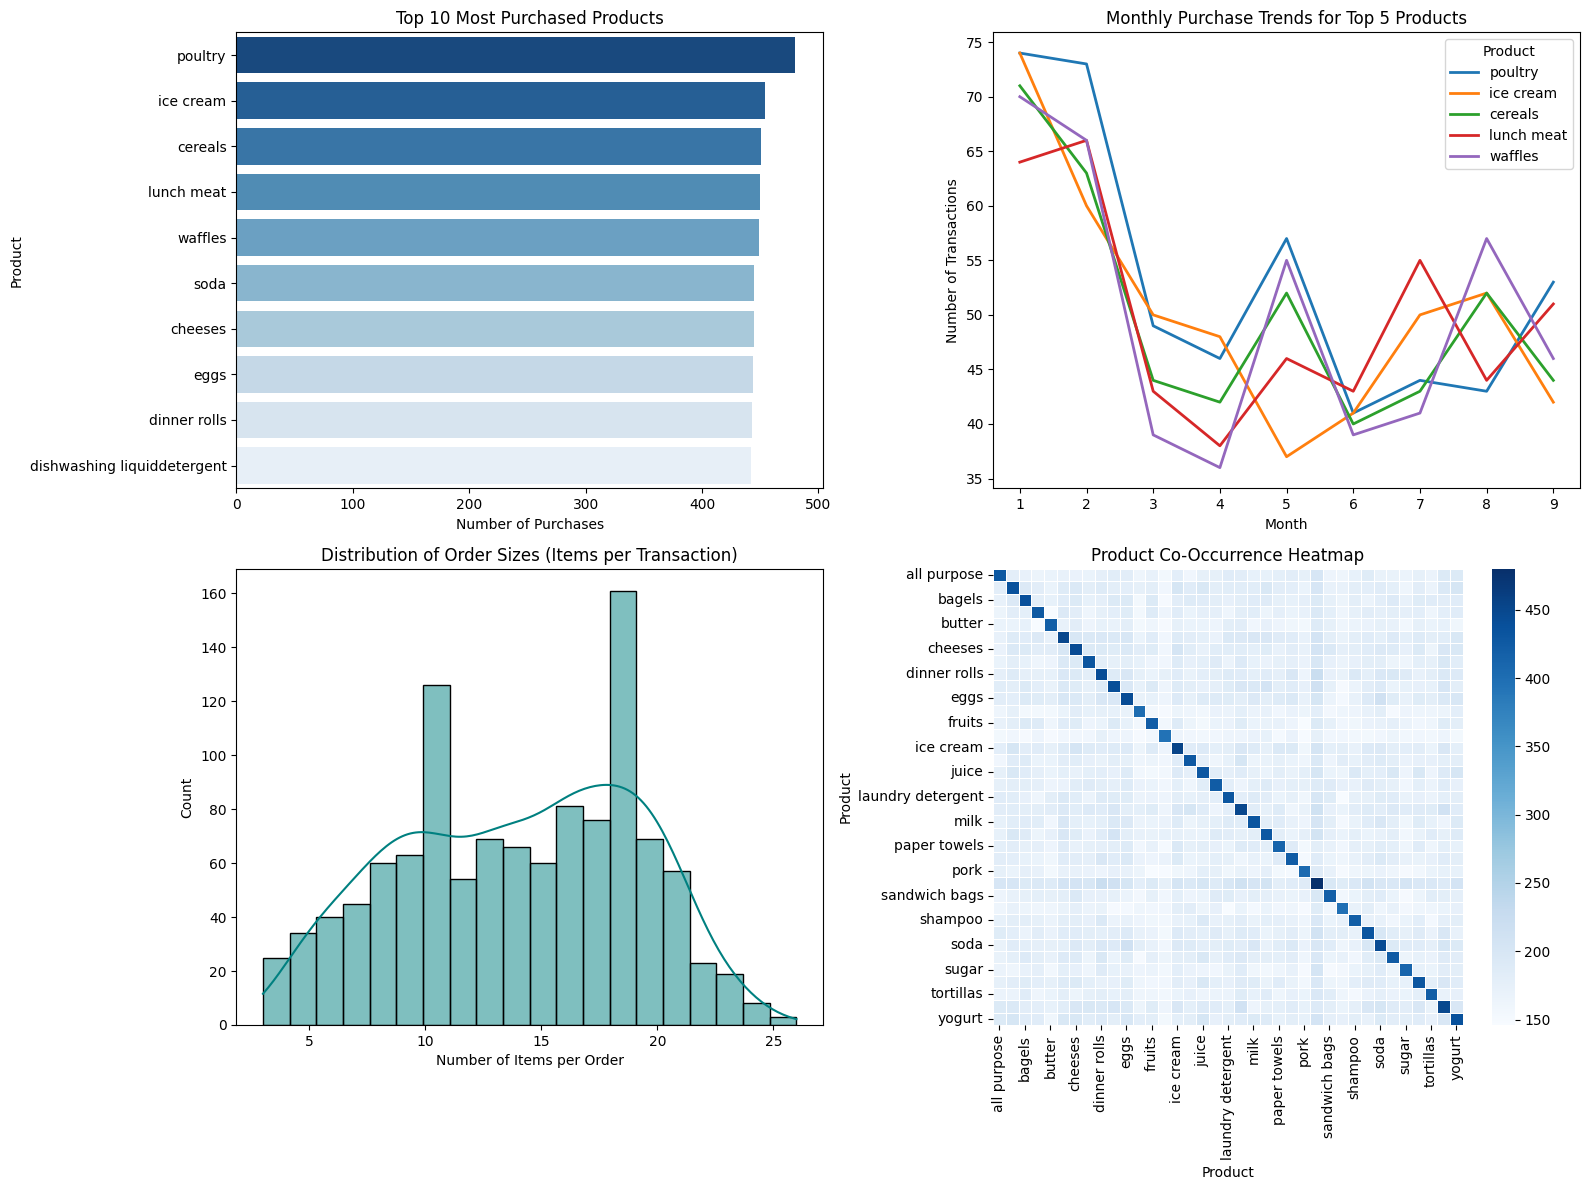

In [9]:
# Step 1: Analyze Top-Selling Products
top_products = df["Product"].value_counts().head(10)

# Step 2: Analyze Monthly Product Trends
monthly_product_trend = df.groupby(["Month", "Product"])["Order_id"].nunique().unstack().fillna(0)

# Step 3: Analyze Order Size Distribution (Number of Items per Transaction)
order_size = df.groupby("Order_id")["Product"].count()

# Step 4: Product Co-occurrence Heatmap Preparation
# Create a pivot table to see co-occurrence of products in transactions
product_pivot = pd.crosstab(df["Order_id"], df["Product"])
co_occurrence_matrix = product_pivot.T.dot(product_pivot)  # Compute co-occurrence matrix

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top-Selling Products
sns.barplot(x=top_products.values, y=top_products.index, ax=axes[0, 0], palette="Blues_r")
axes[0, 0].set_title("Top 10 Most Purchased Products")
axes[0, 0].set_xlabel("Number of Purchases")

# Monthly Product Trend (Line Plot for Top 5 Products)
top_5_products = top_products.index[:5]
monthly_product_trend[top_5_products].plot(ax=axes[0, 1], linewidth=2)
axes[0, 1].set_title("Monthly Purchase Trends for Top 5 Products")
axes[0, 1].set_ylabel("Number of Transactions")

# Order Size Distribution
sns.histplot(order_size, bins=20, kde=True, ax=axes[1, 0], color="teal")
axes[1, 0].set_title("Distribution of Order Sizes (Items per Transaction)")
axes[1, 0].set_xlabel("Number of Items per Order")

# Product Co-occurrence Heatmap
sns.heatmap(co_occurrence_matrix, cmap="Blues", annot=False, linewidths=0.5, ax=axes[1, 1])
axes[1, 1].set_title("Product Co-Occurrence Heatmap")

plt.tight_layout()
plt.show()

In [10]:
df.to_csv("cleaned_data.csv", index=False)